# Code Testing 

Notebook for generating test data to simultaneously test/develop helper code. Quicker than implementing full suite of automated testing but still required for development purposes.

In [3]:
%load_ext autoreload
%autoreload 2

import pandas as pd 


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
#Test - Pricing Signals 
from pricing_signals import PricingSignal, generate_pricing_signal_test_data

In [72]:
pricing_signal = PricingSignal(hedge_lookback = 150, spread_lookback = 100)
#Test Case 1: Static Beta and Intercept, Minimal Noise
test_data = generate_pricing_signal_test_data(n_regimes = 1, regime_betas = [2], noise_std = 0.01, intercept = 2)
intercept, beta = pricing_signal._calculate_hedge_ratio(x = test_data['x'], y= test_data['y'])

/Users/vivbear/Documents/Quant_Research/Projects/pairs_trading_cryptocurrency/pricing_signals.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  import statsmodels.api as sm
100%|██████████| 50/50 [00:00<00:00, 2116.58it/s]


In [73]:
intercept.describe()

count    50.000000
mean      1.998928
std       0.008537
min       1.982777
25%       1.993803
50%       2.001444
75%       2.003503
max       2.017185
dtype: float64

In [74]:
beta.describe()

count    50.000000
mean      2.000035
std       0.000209
min       1.999580
25%       1.999924
50%       1.999975
75%       2.000159
max       2.000428
dtype: float64

<Axes: >

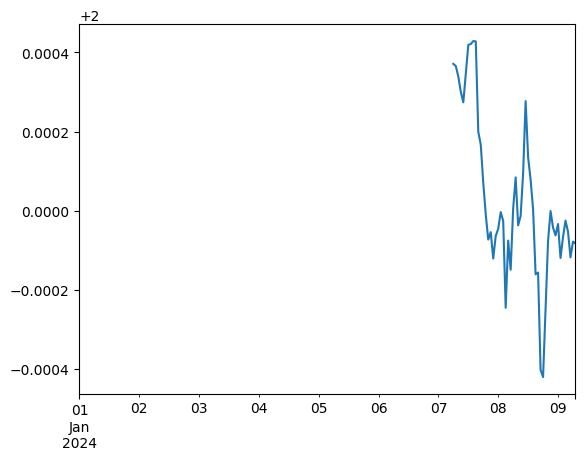

In [75]:
#Why does plot look so different? 
beta.plot()

In [80]:
#No intercept 
pricing_signal = PricingSignal(hedge_lookback = 30, spread_lookback = 30)
test_data = generate_pricing_signal_test_data(n_periods = 200, n_regimes = 2, regime_betas = [2, 6], noise_std = 0.01, intercept = 0)
intercept, beta = pricing_signal._calculate_hedge_ratio(x = test_data['x'], y= test_data['y'], fit_intercept=False)

/Users/vivbear/Documents/Quant_Research/Projects/pairs_trading_cryptocurrency/pricing_signals.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  import statsmodels.api as sm
100%|██████████| 170/170 [00:00<00:00, 6513.97it/s]


<Axes: >

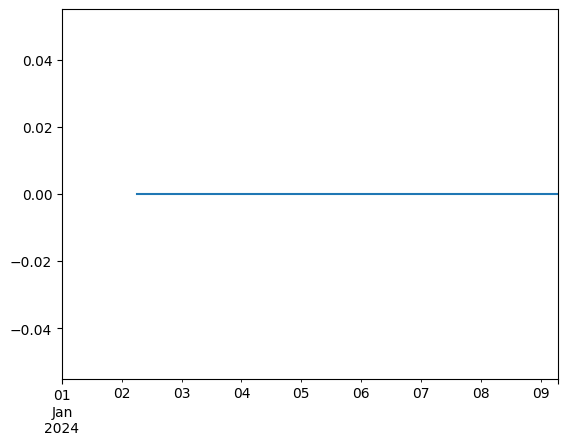

In [81]:
intercept.plot()

<Axes: >

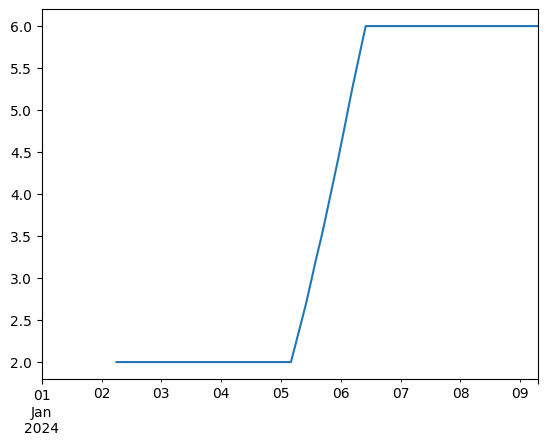

In [82]:
beta.plot()

In [77]:
#Test Case 2: Regime change 
pricing_signal = PricingSignal(hedge_lookback = 30, spread_lookback = 30)
test_data = generate_pricing_signal_test_data(n_periods = 200, n_regimes = 2, regime_betas = [2, 6], noise_std = 0.01, intercept = 2)
intercept, beta = pricing_signal._calculate_hedge_ratio(x = test_data['x'], y= test_data['y'])

/Users/vivbear/Documents/Quant_Research/Projects/pairs_trading_cryptocurrency/pricing_signals.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  import statsmodels.api as sm


100%|██████████| 170/170 [00:00<00:00, 2530.97it/s]


<Axes: >

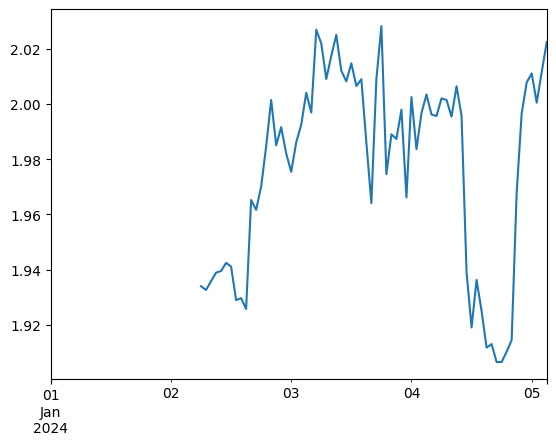

In [78]:
intercept[:100].plot()

<Axes: >

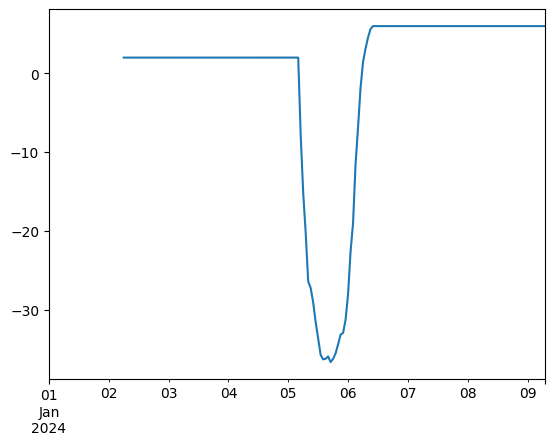

In [79]:
beta.plot()

In [89]:
#Test - Trading Strategy 
from trading_strategy import BollingerBandTradeStrategy, generate_synthetic_zscore

/Users/vivbear/Documents/Quant_Research/Projects/pairs_trading_cryptocurrency/trading_strategy.py:208: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.


<Axes: >

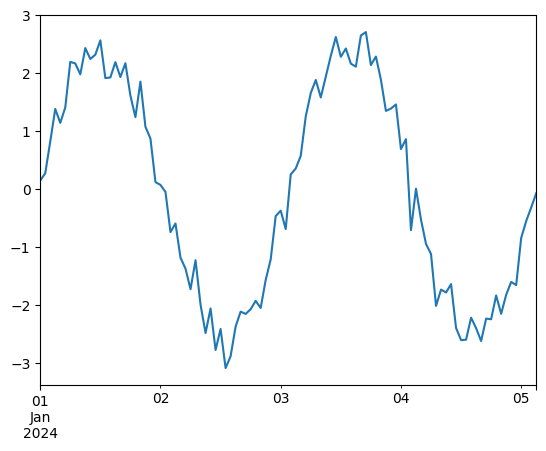

In [90]:
test_zscore = generate_synthetic_zscore(n_periods = 100, seed = 42)
test_zscore.plot()

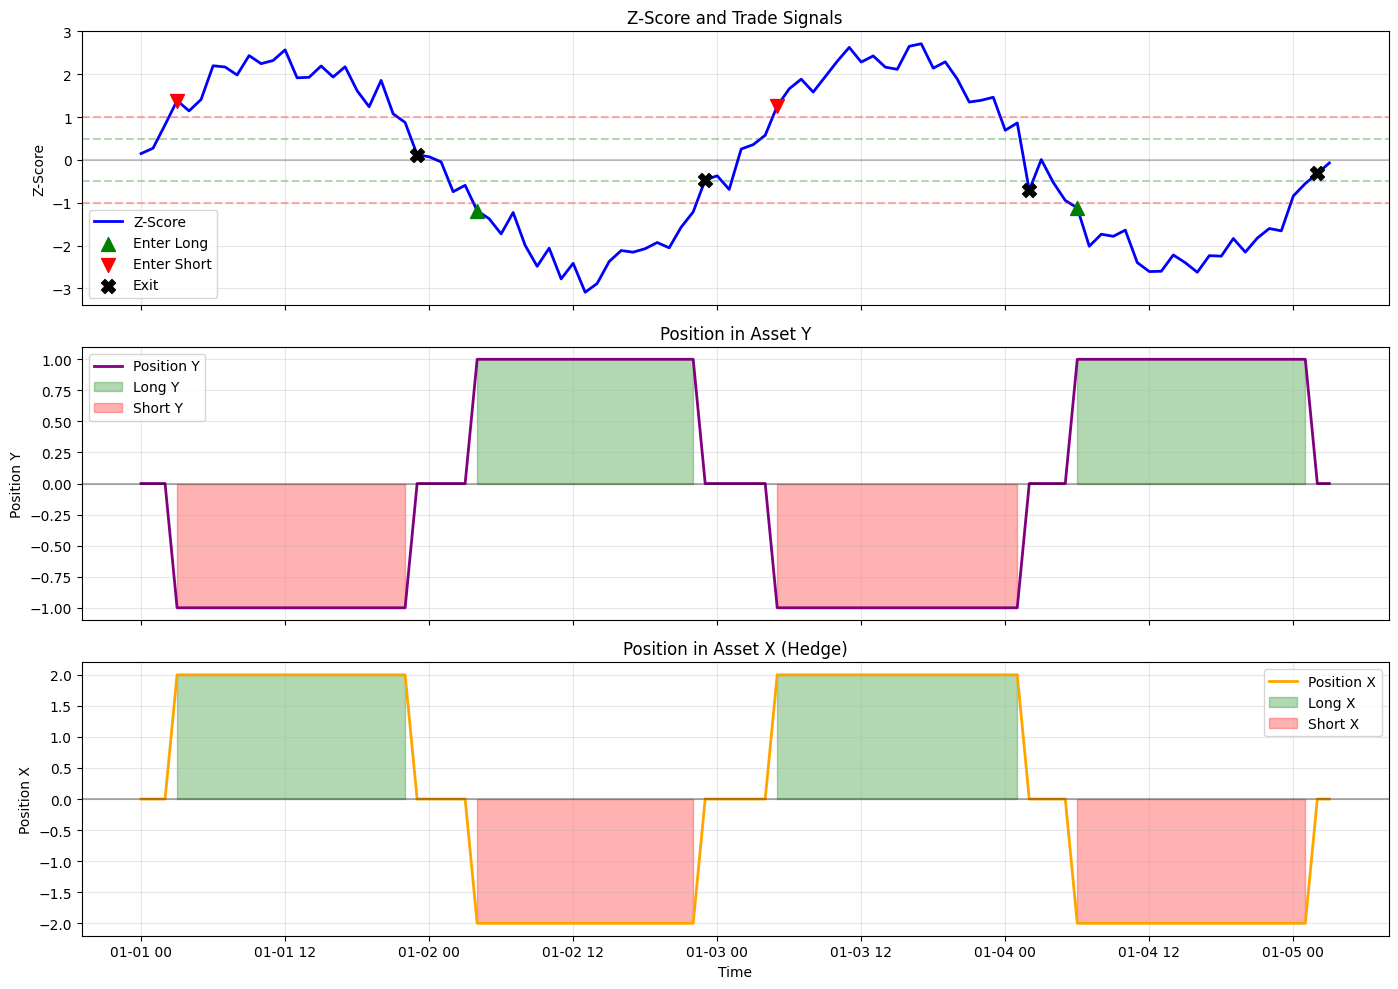

In [94]:
bb = BollingerBandTradeStrategy(entry_threshold= 1, exit_threshold= 0.5)
beta = pd.Series(2.0, index = test_zscore.index)
bb.plot_positions(beta = beta, z_score = test_zscore)

In [ ]:
#Test - Portfolio Manager 
#Want to test idealised portfolio manager 
#Does it calculate PnL correctly?

In [97]:
from portfolio_manager.portfolio_manager import PortfolioManager
from datetime import datetime

In [132]:
#Case 1 - Test Data 

length = 100
index = pd.date_range(end=datetime.today(), periods=length, freq='D')
desired_positions = pd.DataFrame({
    'position_y': pd.Series(0.0, index = index), #keep hodling 
    'position_x': pd.Series(1.0, index = index), #just keep holding 
})
prices_x = pd.Series(np.arange(1, length+1), index = index)
prices_y = pd.Series(np.random.randint(0, 50, size = length), index = index)

In [133]:
manager = PortfolioManager(trading_periods_per_year=365, initial_capital=10_000, idealised = True)
results = manager.backtest(desired_positions= desired_positions, prices_y= prices_y, prices_x = prices_x)

100%|██████████| 100/100 [00:00<00:00, 7804.52it/s]

2025-09-03 15:06:50.172763
2025-09-04 15:06:50.172763
2025-09-05 15:06:50.172763
2025-09-06 15:06:50.172763
2025-09-07 15:06:50.172763
2025-09-08 15:06:50.172763
2025-09-09 15:06:50.172763
2025-09-10 15:06:50.172763
2025-09-11 15:06:50.172763
2025-09-12 15:06:50.172763
2025-09-13 15:06:50.172763
2025-09-14 15:06:50.172763
2025-09-15 15:06:50.172763
2025-09-16 15:06:50.172763
2025-09-17 15:06:50.172763
2025-09-18 15:06:50.172763
2025-09-19 15:06:50.172763
2025-09-20 15:06:50.172763
2025-09-21 15:06:50.172763
2025-09-22 15:06:50.172763
2025-09-23 15:06:50.172763
2025-09-24 15:06:50.172763
2025-09-25 15:06:50.172763
2025-09-26 15:06:50.172763
2025-09-27 15:06:50.172763
2025-09-28 15:06:50.172763
2025-09-29 15:06:50.172763
2025-09-30 15:06:50.172763
2025-10-01 15:06:50.172763
2025-10-02 15:06:50.172763
2025-10-03 15:06:50.172763
2025-10-04 15:06:50.172763
2025-10-05 15:06:50.172763
2025-10-06 15:06:50.172763
2025-10-07 15:06:50.172763
2025-10-08 15:06:50.172763
2025-10-09 15:06:50.172763
2

In [114]:
results['position_history']

,position_y,position_x
2025-09-03 14:59:18.189266,0.0,1.0
2025-09-04 14:59:18.189266,0.0,1.0
2025-09-05 14:59:18.189266,0.0,1.0
2025-09-06 14:59:18.189266,0.0,1.0
2025-09-07 14:59:18.189266,0.0,1.0
...,...,...
2025-12-07 14:59:18.189266,0.0,1.0
2025-12-08 14:59:18.189266,0.0,1.0
2025-12-09 14:59:18.189266,0.0,1.0
2025-12-10 14:59:18.189266,0.0,1.0


<Axes: >

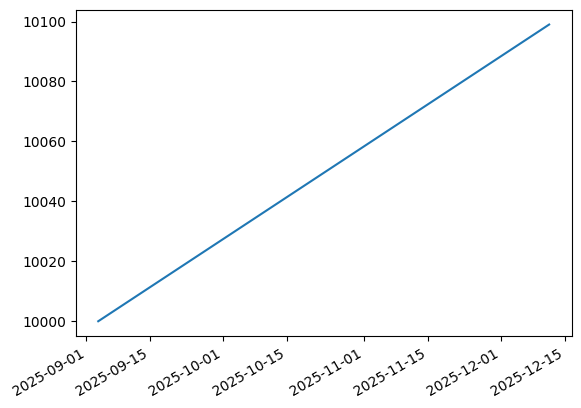

In [115]:
results['equity_curve'].plot()

<Axes: >

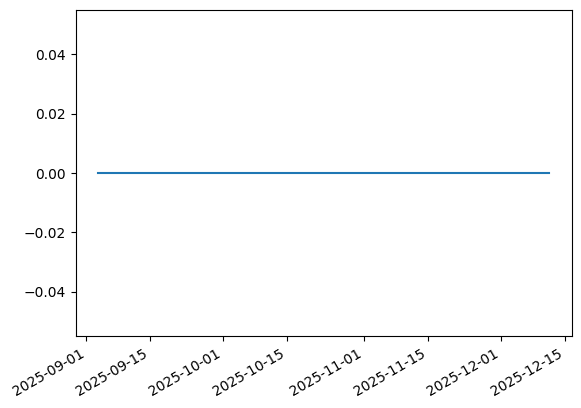

In [120]:
results['cost_series'].plot()

In [122]:
results['total_return']

np.float64(0.0099)

In [121]:
results['sharpe']

np.float64(189.13923442797375)

In [158]:
#Case 1 - 2 - Realistic case 

length = 5
index = pd.date_range(end=datetime.today(), periods=length, freq='D')
desired_positions = pd.DataFrame({
    'position_y': pd.Series([1.0, 1.0, 0.0, -1.0, -1.0], index = index), #first long the portfolio, then short the portfolio 
    'position_x': pd.Series([-2.0, -2.0, 0.0, 2.0, 2.0], index = index), 
})
prices_x = pd.Series([1, 2, 3, 4, 5], index = index)
prices_y = pd.Series([1, 8, 9, 10, 2], index = index)
manager = PortfolioManager(trading_periods_per_year=365, idealised = True)
results = manager.backtest(desired_positions= desired_positions, prices_y= prices_y, prices_x = prices_x)

100%|██████████| 5/5 [00:00<00:00, 5059.47it/s]


In [147]:
prices_x

2025-12-07 15:08:34.821651    1
2025-12-08 15:08:34.821651    2
2025-12-09 15:08:34.821651    3
2025-12-10 15:08:34.821651    4
2025-12-11 15:08:34.821651    5
Freq: D, dtype: int64

In [146]:
prices_y

2025-12-07 15:08:34.821651     1
2025-12-08 15:08:34.821651     8
2025-12-09 15:08:34.821651     9
2025-12-10 15:08:34.821651    10
2025-12-11 15:08:34.821651     2
Freq: D, dtype: int64

In [142]:
results['position_history']

,position_y,position_x
2025-12-07 15:08:34.821651,1.0,-2.0
2025-12-08 15:08:34.821651,1.0,-2.0
2025-12-09 15:08:34.821651,0.0,0.0
2025-12-10 15:08:34.821651,-1.0,2.0
2025-12-11 15:08:34.821651,-1.0,2.0


In [148]:
results['final_equity']

np.float64(10014.0)

In [149]:
results['equity_curve']

2025-12-07 15:08:34.821651    10000.0
2025-12-08 15:08:34.821651    10005.0
2025-12-09 15:08:34.821651    10004.0
2025-12-10 15:08:34.821651    10004.0
2025-12-11 15:08:34.821651    10014.0
Freq: D, dtype: float64

In [159]:
results['absolute_sharpe']

np.float64(11.483508511858885)

In [161]:
(results['net_pnl_series'].mean()/results['net_pnl_series'].std())*np.sqrt(365)

np.float64(11.483508511858886)